In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

Loading and Observing the Dataset

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [5]:
print(train_df.shape)
print(test_df.shape)


(11504798, 12)
(7669866, 11)


In [6]:
print(train_df.columns)
print(test_df.columns)


Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')
Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')


In [7]:
train_df.head(10)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.00,0,1-2 Year,Yes,65101.00,124.00,187,0
1,1,Male,43,1,28.00,0,> 2 Years,Yes,58911.00,26.00,288,1
2,2,Female,25,1,14.00,1,< 1 Year,No,38043.00,152.00,254,0
3,3,Female,35,1,1.00,0,1-2 Year,Yes,2630.00,156.00,76,0
4,4,Female,36,1,15.00,1,1-2 Year,No,31951.00,152.00,294,0
5,5,Female,31,1,47.00,1,< 1 Year,No,28150.00,152.00,197,0
6,6,Male,23,1,45.00,1,< 1 Year,No,27128.00,152.00,190,0
7,7,Female,47,1,8.00,0,1-2 Year,Yes,40659.00,26.00,262,1
8,8,Female,26,1,28.00,1,< 1 Year,No,31639.00,152.00,36,0
9,9,Female,66,1,11.00,0,1-2 Year,Yes,2630.00,26.00,125,0


Analysis and Cleaning the Dataset

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [9]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00
mean,5752398.50,38.38,1.00,26.42,0.46,30461.37,112.43,163.90,0.12
std,3321149.26,14.99,0.04,12.99,0.50,16454.75,54.04,79.98,0.33
min,0.00,20.00,0.00,0.00,0.00,2630.00,1.00,10.00,0.00
25%,2876199.25,24.00,1.00,15.00,0.00,25277.00,29.00,99.00,0.00
50%,5752398.50,36.00,1.00,28.00,0.00,31824.00,151.00,166.00,0.00
75%,8628597.75,49.00,1.00,35.00,1.00,39451.00,152.00,232.00,0.00
max,11504797.00,85.00,1.00,52.00,1.00,540165.00,163.00,299.00,1.00


In [11]:
train_df = train_df.drop(['id'], axis=1)
test_df = test_df.drop(['id'], axis=1)
combine = [train_df, test_df]

In [12]:
train_df.duplicated().sum()

0

Observing the Distribution of the Data

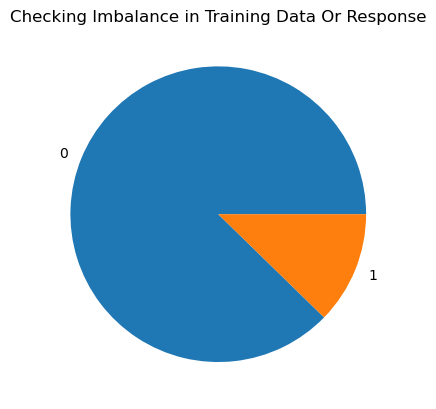

In [13]:
response_data = train_df['Response'].value_counts()
plt.pie(response_data, labels = [0,1])
plt.title('Checking Imbalance in Training Data Or Response')
plt.show()

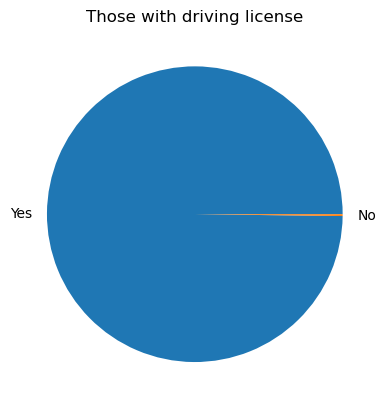

In [14]:
response_data = train_df['Driving_License'].value_counts()
plt.pie(response_data, labels = ['Yes','No'])
plt.title('Those with driving license')
plt.show()

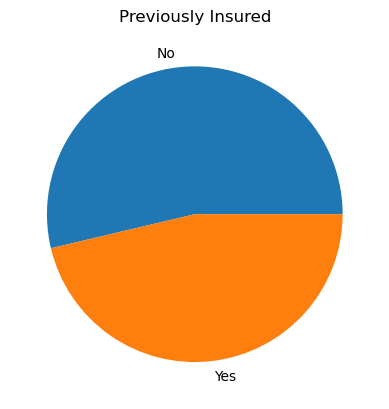

In [15]:
response_data = train_df['Previously_Insured'].value_counts()
plt.pie(response_data, labels = ['No','Yes'])
plt.title('Previously Insured')
plt.show()

In [16]:
train_df[['Driving_License', 'Response']].groupby(['Driving_License'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Driving_License,Response
1,1,0.12
0,0,0.06


In [17]:
train_df[['Previously_Insured', 'Response']].groupby(['Previously_Insured'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Previously_Insured,Response
0,0,0.23
1,1,0.00


In [18]:
train_df[['Vehicle_Damage', 'Response']].groupby(['Vehicle_Damage'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Vehicle_Damage,Response
1,Yes,0.24
0,No,0.00


In [19]:
train_df[['Vehicle_Age', 'Response']].groupby(['Vehicle_Age'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Vehicle_Age,Response
2,> 2 Years,0.30
0,1-2 Year,0.18
1,< 1 Year,0.04


In [20]:
train_df[['Gender', 'Response']].groupby(['Gender'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Gender,Response
1,Male,0.14
0,Female,0.10


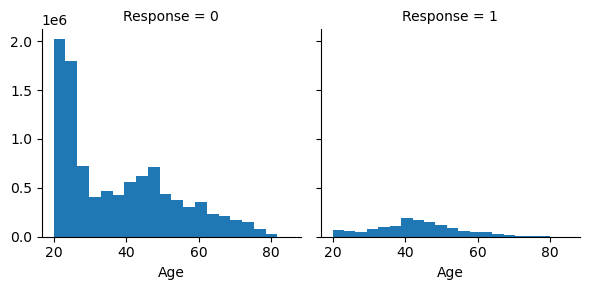

In [21]:
g = sns.FacetGrid(train_df, col='Response')
g.map(plt.hist, 'Age', bins=20)

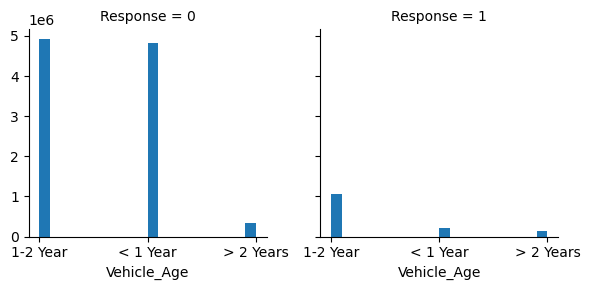

In [22]:
g = sns.FacetGrid(train_df, col='Response')
g.map(plt.hist, 'Vehicle_Age', bins=20)

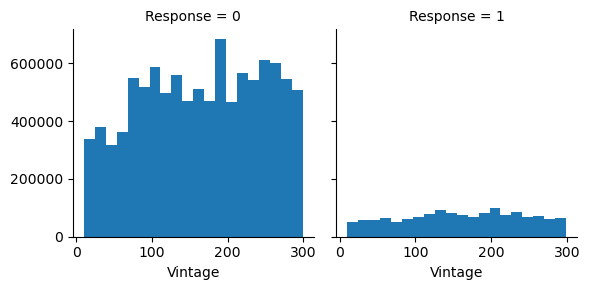

In [23]:
g = sns.FacetGrid(train_df, col='Response')
g.map(plt.hist, 'Vintage', bins=20)

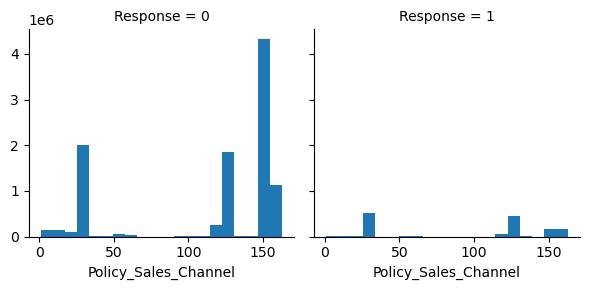

In [24]:
g = sns.FacetGrid(train_df, col='Response')
g.map(plt.hist, 'Policy_Sales_Channel', bins=20)

/Users/shravya/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


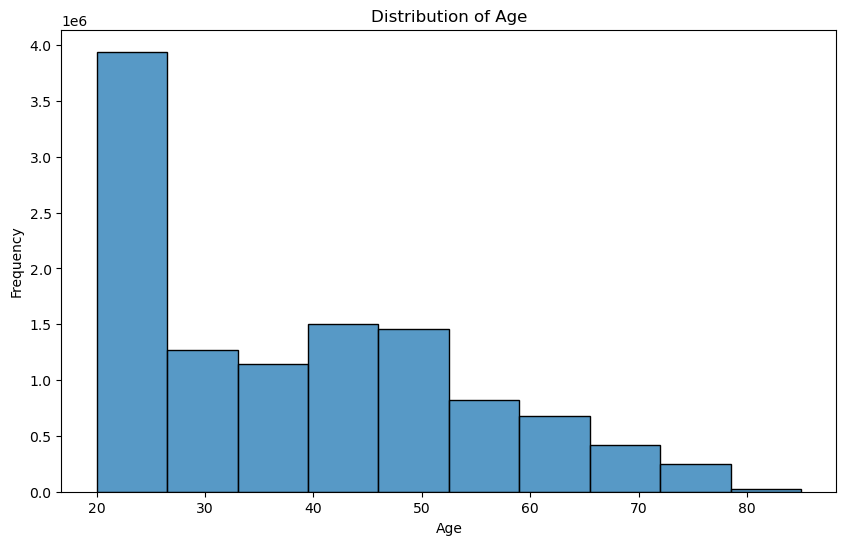

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], kde=False, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [26]:
Q1=train_df['Annual_Premium'].quantile(0.25)
Q3=train_df['Annual_Premium'].quantile(0.75)

IQR = Q3 - Q1


lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

train_df = train_df[(train_df['Annual_Premium'] >= lb) & (train_df['Annual_Premium'] <= ub)]

# Display the result


/Users/shravya/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


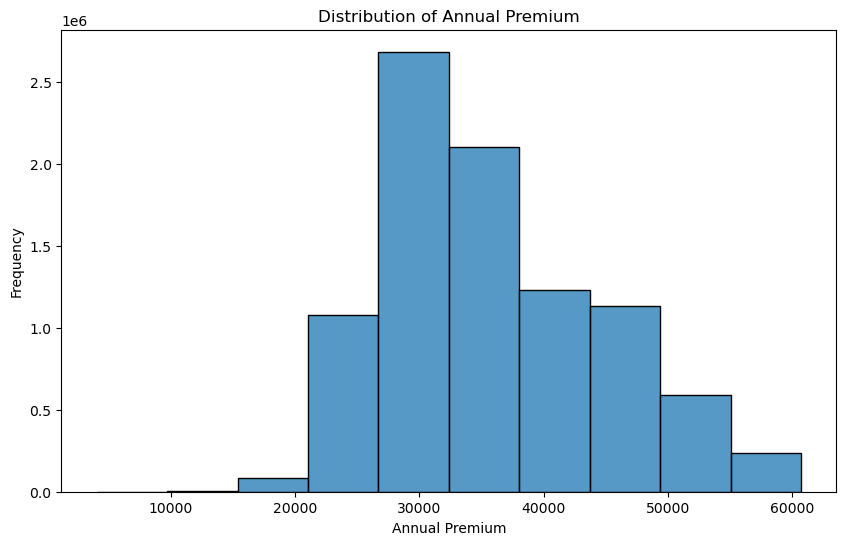

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Annual_Premium'], kde=False, bins=10)
plt.title('Distribution of Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()

/Users/shravya/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


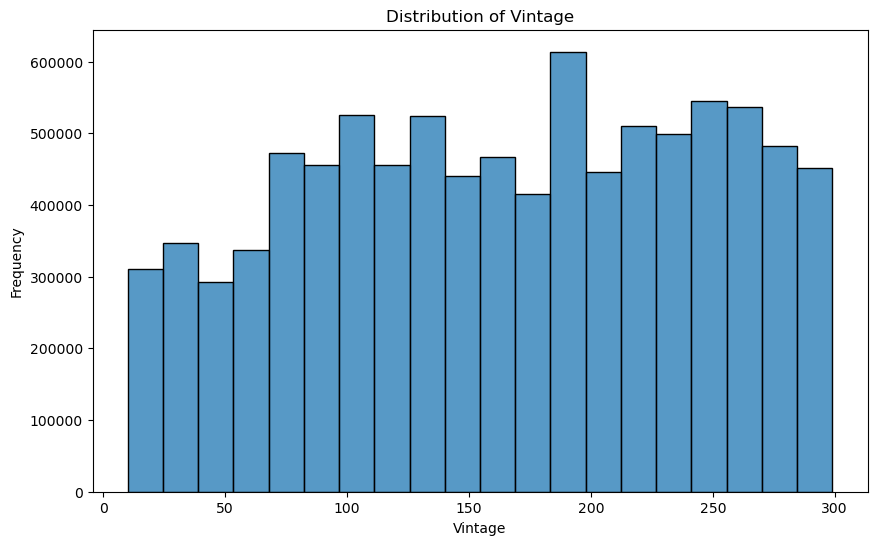

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Vintage'], kde=False, bins=20)
plt.title('Distribution of Vintage')
plt.xlabel('Vintage')
plt.ylabel('Frequency')
plt.show()

/Users/shravya/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


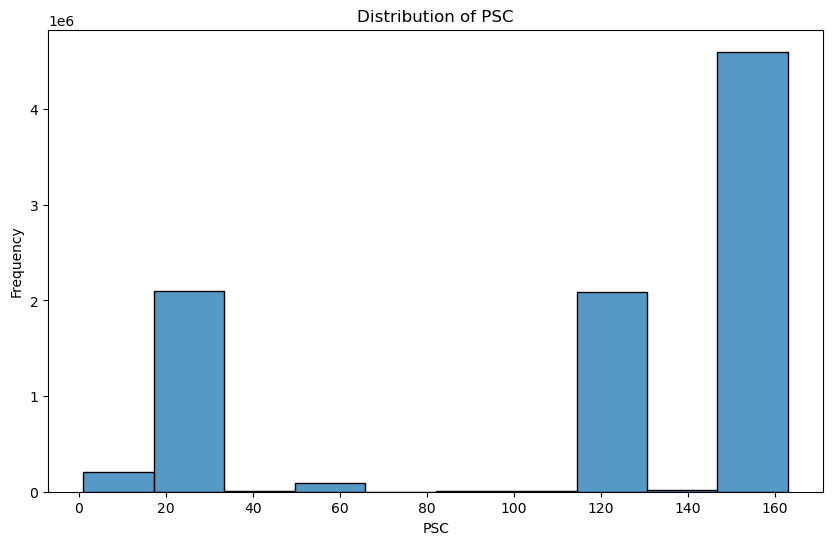

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Policy_Sales_Channel'], kde=False, bins=10)
plt.title('Distribution of PSC')
plt.xlabel('PSC')
plt.ylabel('Frequency')
plt.show()

Classifying the Data into intervals and Encoding the categorical data

In [30]:
labels=[0,1,2,3,4,5,6,7,8,9]

In [31]:
train_df['Age'] = pd.cut(train_df['Age'], bins=10,labels=labels)
test_df['Age'] = pd.cut(test_df['Age'], bins=10,labels=labels)


/var/folders/46/xgtb_bds0_9537q_jdnf4jsm0000gn/T/ipykernel_310/2793591764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age'] = pd.cut(train_df['Age'], bins=10,labels=labels)


In [32]:
train_df['Annual_Premium'] = pd.cut(train_df['Annual_Premium'], bins=10,labels=labels)
test_df['Annual_Premium'] = pd.cut(test_df['Annual_Premium'], bins=10,labels=labels)

/var/folders/46/xgtb_bds0_9537q_jdnf4jsm0000gn/T/ipykernel_310/3732691892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Annual_Premium'] = pd.cut(train_df['Annual_Premium'], bins=10,labels=labels)


In [33]:
train_df['Policy_Sales_Channel'] = pd.cut(train_df['Policy_Sales_Channel'], bins=10,labels=labels)
test_df['Policy_Sales_Channel'] = pd.cut(test_df['Policy_Sales_Channel'], bins=10,labels=labels)

/var/folders/46/xgtb_bds0_9537q_jdnf4jsm0000gn/T/ipykernel_310/792960236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Policy_Sales_Channel'] = pd.cut(train_df['Policy_Sales_Channel'], bins=10,labels=labels)


In [34]:
train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,Male,3,1,28.00,0,> 2 Years,Yes,9,1,288,1
2,Female,0,1,14.00,1,< 1 Year,No,6,9,254,0
4,Female,2,1,15.00,1,1-2 Year,No,4,9,294,0
5,Female,1,1,47.00,1,< 1 Year,No,4,9,197,0
6,Male,0,1,45.00,1,< 1 Year,No,4,9,190,0


In [35]:
print(train_df['Vehicle_Age'].unique())

['> 2 Years' '< 1 Year' '1-2 Year']


['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],

In [36]:
train_df.dtypes

Gender                    object
Age                     category
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Vehicle_Age               object
Vehicle_Damage            object
Annual_Premium          category
Policy_Sales_Channel    category
Vintage                    int64
Response                   int64
dtype: object

In [37]:

gender_map={'Male':1,'Female':0}
train_df['Gender'] = train_df['Gender'].map(gender_map)
test_df['Gender'] = test_df['Gender'].map(gender_map)

va_map={'< 1 Year':0,'1-2 Year':1,'> 2 Years':2}

train_df['Vehicle_Age'] = train_df['Vehicle_Age'].map(va_map)
test_df['Vehicle_Age'] = test_df['Vehicle_Age'].map(va_map)

vd_map={'Yes':1,'No':0}

train_df['Vehicle_Damage'] = train_df['Vehicle_Damage'].map(vd_map)
test_df['Vehicle_Damage'] = test_df['Vehicle_Damage'].map(vd_map)

print(train_df.head())
print(test_df.head())

/var/folders/46/xgtb_bds0_9537q_jdnf4jsm0000gn/T/ipykernel_310/2581324415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Gender'] = train_df['Gender'].map(gender_map)
/var/folders/46/xgtb_bds0_9537q_jdnf4jsm0000gn/T/ipykernel_310/2581324415.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Vehicle_Age'] = train_df['Vehicle_Age'].map(va_map)
/var/folders/46/xgtb_bds0_9537q_jdnf4jsm0000gn/T/ipykernel_310/2581324415.py:12: SettingWithCopyWarning: 
A value is trying to be set on a cop

   Gender Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
1       1   3                1        28.00                   0            2   
2       0   0                1        14.00                   1            0   
4       0   2                1        15.00                   1            1   
5       0   1                1        47.00                   1            0   
6       1   0                1        45.00                   1            0   

   Vehicle_Damage Annual_Premium Policy_Sales_Channel  Vintage  Response  
1               1              9                    1      288         1  
2               0              6                    9      254         0  
4               0              4                    9      294         0  
5               0              4                    9      197         0  
6               0              4                    9      190         0  
   Gender Age  Driving_License  Region_Code  Previously_Insured  Vehi

In [38]:
train_df['Region_Code'] = train_df['Region_Code'].astype(int)

/var/folders/46/xgtb_bds0_9537q_jdnf4jsm0000gn/T/ipykernel_310/2794434854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Region_Code'] = train_df['Region_Code'].astype(int)


In [39]:
train_df.dtypes

Gender                     int64
Age                     category
Driving_License            int64
Region_Code                int64
Previously_Insured         int64
Vehicle_Age                int64
Vehicle_Damage             int64
Annual_Premium          category
Policy_Sales_Channel    category
Vintage                    int64
Response                   int64
dtype: object

In [40]:
train_df.shape

(9127525, 11)

In [41]:
test_df.dtypes

Gender                     int64
Age                     category
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Vehicle_Age                int64
Vehicle_Damage             int64
Annual_Premium          category
Policy_Sales_Channel    category
Vintage                    int64
dtype: object

<Axes: >

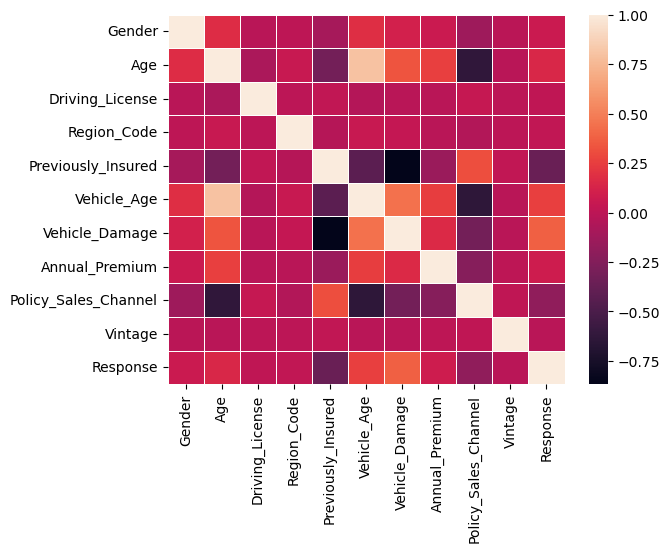

In [42]:
cor=train_df.corr()
sns.heatmap(cor,cbar=True,linewidth=0.5)

Scaling and Sampling the Data

In [43]:
sampled_df = train_df.sample(frac=0.1, random_state=1)
X=sampled_df.drop('Response',axis=1)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X)
y=sampled_df['Response']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=42)

### Logistic Regression

In [45]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
print("Accuracy: ",model.score(X_test,y_test))
y_pred=model.predict(X_test)
roc_auc=roc_auc_score(y_test,y_pred)
print("ROC_AUC_Score: ",roc_auc)

Accuracy:  0.8778259226188846
ROC_AUC_Score:  0.50886988223619


In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[159768    630]
 [ 21673    480]]


High Sensitivity: (99.61%): The model is very good at identifying the positive class.

Low Specificity (2.17%): The model struggles to correctly identify the negative class, resulting in many false positives.

Balanced F1 Score (93.38%): Reflects a good balance between precision and recall.

This analysis suggests that the model is heavily biased towards predicting the positive class, which may be acceptable if false negatives are very costly. However, if false positives are also critical, this bias would need to be addressed.

### Decision Tree Classifier


In [47]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X_train, y_train)
print("Accuracy: ",model.score(X_test,y_test))
y_pred=model.predict(X_test)
roc_auc=roc_auc_score(y_test,y_pred)
print("ROC_AUC_Score: ",roc_auc)

Accuracy:  0.8786476108046518
ROC_AUC_Score:  0.5


In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[160398      0]
 [ 22153      0]]


All predictions are positive. This indicates high bias.